# Тема “Обучение без учителя”

## Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InLineBackend.figure_format = 'svg' 

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:

`n_components=2, learning_rate=250, random_state=42.`

Постройте диаграмму рассеяния на этих данных.


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

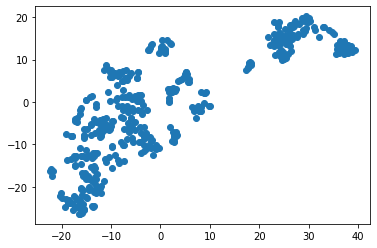

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_train)

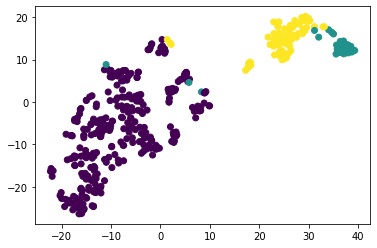

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.show()

In [9]:
temp_df = pd.DataFrame()
temp_df['CRIM'] = X_train['CRIM']
temp_df['price'] = y_train
temp_df['Label'] = train_labels

In [10]:
temp_df.groupby('Label').mean()

,CRIM,price
Label,,
0,0.404863,25.168687
1,14.360380,13.196774
2,11.745662,17.442105


## *Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [11]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

labels_test = model.fit_predict(X_test_scaled)

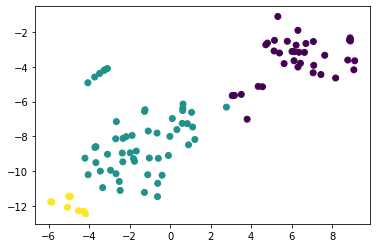

In [12]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [13]:
temp_df = pd.DataFrame()
temp_df['CRIM'] = X_test['CRIM']
temp_df['price'] = y_test
temp_df['Label'] = labels_test

In [14]:
temp_df.groupby('Label').mean()

,CRIM,price
Label,,
0,9.419182,16.710526
1,0.219297,22.690909
2,0.040703,34.311111
